In [91]:
import pandas

In [92]:
titanic = pandas.read_csv('../../data/titanic.csv', index_col='PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [93]:
titanic.loc[2, 'Survived'] = -1
titanic.loc[4, 'Survived'] = -1

In [94]:
X = titanic[['Pclass']]

In [95]:
y = titanic.Survived

In [96]:
import sklearn.linear_model

In [97]:
clf = sklearn.linear_model.LogisticRegression(C=1000000)

In [98]:
clf.fit(X, y)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [99]:
clf.predict([[1],[3]])

array([1, 0])

In [100]:
clf.predict_proba([[1],[3]])

array([[  9.24472965e-03,   3.54551374e-01,   6.36203896e-01],
       [  1.50983972e-11,   7.50406044e-01,   2.49593956e-01]])

In [101]:
clf.coef_

array([[-10.12145371],
       [  0.85010171],
       [ -0.83154225]])

In [102]:
clf.intercept_

array([ 5.44861425, -1.44677627,  1.39476151])

Let's do the maths that turns a 3rd class passenger's logit ratio of dying
into a probability

In [103]:
import math

In [104]:
logit_odds = -1.44677627 +  3 * 0.8501017
logit_odds

1.1035288300000001

In [105]:
odds = math.exp(logit_odds)
odds

3.014785942059033

In [106]:
probability = odds / ( 1 + odds )
probability

0.7509207179580942

In [107]:
titanic.fillna?

In [108]:
titanic.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [109]:
titanic_with_fills = titanic.fillna({'Age': titanic.Age.mean()})

In [110]:
titanic_with_fills

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,-1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,-1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S


In [111]:
titanic_without_na = titanic.dropna(subset=['Age'])
titanic_without_na

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,-1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,-1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [112]:
titanic_without_na2 = titanic[titanic.Age.notnull()]

In [113]:
titanic_adults = titanic[titanic.Age.notnull() & (titanic.Age > 18)]
titanic_adults

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,-1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,-1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [114]:
import numpy

In [115]:
titanic_with_fills['Gender'] = numpy.where(titanic_with_fills.Sex == 'male', 1, 0)

In [116]:
titanic.Sex.unique()

array(['male', 'female'], dtype=object)

In [117]:
titanic_with_fills

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
2,-1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,-1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,0


In [118]:
X = titanic_with_fills[['Pclass', 'Age', 'Gender']]

In [119]:
y = titanic_with_fills.Survived

In [120]:
clf.fit(X,y)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [121]:
clf.predict_proba( [ [1, 24, 0],   [3, 5, 1]])

array([[  1.79638634e-02,   5.89126322e-02,   9.23123504e-01],
       [  5.43915478e-12,   8.21905812e-01,   1.78094188e-01]])

In [122]:
clf.predict( [ [1, 24, 0],   [3, 5, 1]])

array([1, 0])

Let's make a pretty picture that shows predictions across age.

In [123]:
import seaborn

In [126]:
%matplotlib inline

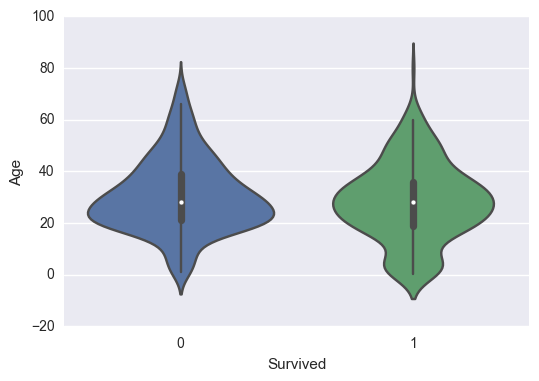

In [131]:
seaborn.violinplot(x='Survived', y='Age', data=titanic_without_na[titanic_without_na.Survived >= 0])

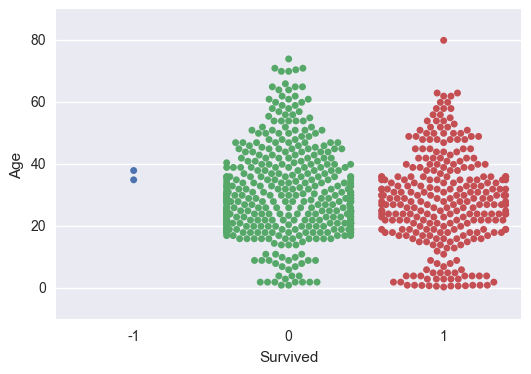

In [134]:
seaborn.swarmplot(x='Survived', y='Age', data=titanic_without_na)

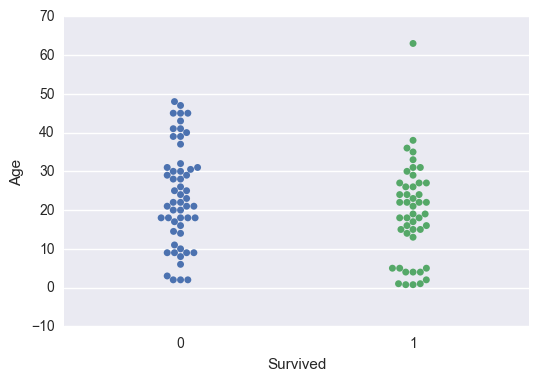

In [148]:
seaborn.swarmplot(x='Survived', y='Age', 
                  data=titanic_without_na[
                    (titanic_without_na.Sex == 'female') & 
                    (titanic_without_na.Pclass == 3)
                                         ])

Now compare reality (above) with our prediction engine....

In [136]:
predictions = clf.predict_proba( [
        [3, 5, 0],
        [3, 6, 0],
        [3, 7, 0]
        ]
)
predictions

array([[  1.26048570e-08,   2.58963522e-01,   7.41036465e-01],
       [  1.27834961e-08,   2.65427404e-01,   7.34572583e-01],
       [  1.29646389e-08,   2.71993355e-01,   7.28006632e-01]])

In [137]:
survival = predictions[:,2]
survival

array([ 0.74103647,  0.73457258,  0.72800663])

In [143]:
fake_dataset = [
    [3, a, 0] for a in range(0,95)
]
fake_dataset

[[3, 0, 0],
 [3, 1, 0],
 [3, 2, 0],
 [3, 3, 0],
 [3, 4, 0],
 [3, 5, 0],
 [3, 6, 0],
 [3, 7, 0],
 [3, 8, 0],
 [3, 9, 0],
 [3, 10, 0],
 [3, 11, 0],
 [3, 12, 0],
 [3, 13, 0],
 [3, 14, 0],
 [3, 15, 0],
 [3, 16, 0],
 [3, 17, 0],
 [3, 18, 0],
 [3, 19, 0],
 [3, 20, 0],
 [3, 21, 0],
 [3, 22, 0],
 [3, 23, 0],
 [3, 24, 0],
 [3, 25, 0],
 [3, 26, 0],
 [3, 27, 0],
 [3, 28, 0],
 [3, 29, 0],
 [3, 30, 0],
 [3, 31, 0],
 [3, 32, 0],
 [3, 33, 0],
 [3, 34, 0],
 [3, 35, 0],
 [3, 36, 0],
 [3, 37, 0],
 [3, 38, 0],
 [3, 39, 0],
 [3, 40, 0],
 [3, 41, 0],
 [3, 42, 0],
 [3, 43, 0],
 [3, 44, 0],
 [3, 45, 0],
 [3, 46, 0],
 [3, 47, 0],
 [3, 48, 0],
 [3, 49, 0],
 [3, 50, 0],
 [3, 51, 0],
 [3, 52, 0],
 [3, 53, 0],
 [3, 54, 0],
 [3, 55, 0],
 [3, 56, 0],
 [3, 57, 0],
 [3, 58, 0],
 [3, 59, 0],
 [3, 60, 0],
 [3, 61, 0],
 [3, 62, 0],
 [3, 63, 0],
 [3, 64, 0],
 [3, 65, 0],
 [3, 66, 0],
 [3, 67, 0],
 [3, 68, 0],
 [3, 69, 0],
 [3, 70, 0],
 [3, 71, 0],
 [3, 72, 0],
 [3, 73, 0],
 [3, 74, 0],
 [3, 75, 0],
 [3, 76, 0],
 [3, 77, 

In [144]:
fake_predictions = clf.predict_proba(fake_dataset)
survival = fake_predictions[:,2]
survival

array([ 0.77178881,  0.76584997,  0.75980466,  0.75365346,  0.7473971 ,
        0.74103647,  0.73457258,  0.72800663,  0.72133994,  0.71457401,
        0.70771048,  0.70075116,  0.69369802,  0.68655319,  0.67931895,
        0.67199774,  0.66459219,  0.65710504,  0.64953922,  0.64189778,
        0.63418394,  0.62640106,  0.61855263,  0.61064227,  0.60267374,
        0.59465091,  0.58657777,  0.57845841,  0.57029703,  0.56209789,
        0.55386537,  0.5456039 ,  0.53731797,  0.52901213,  0.52069098,
        0.51235913,  0.50402124,  0.49568195,  0.48734594,  0.47901784,
        0.47070229,  0.46240388,  0.45412719,  0.44587671,  0.4376569 ,
        0.42947214,  0.42132673,  0.41322489,  0.40517073,  0.39716827,
        0.38922142,  0.38133397,  0.37350958,  0.36575178,  0.35806398,
        0.35044943,  0.34291125,  0.3354524 ,  0.3280757 ,  0.32078382,
        0.31357925,  0.30646435,  0.29944132,  0.29251217,  0.28567881,
        0.27894293,  0.2723061 ,  0.26576974,  0.25933509,  0.25

In [145]:
import matplotlib

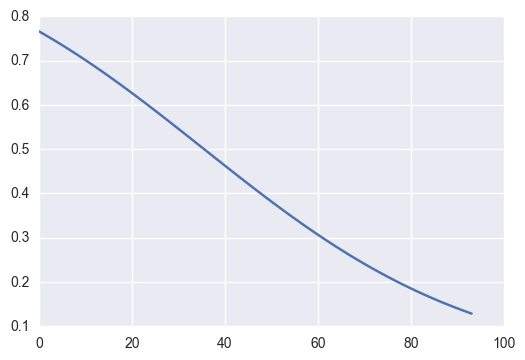

In [142]:
matplotlib.pyplot.plot(survival)

In [149]:
import sklearn.metrics

In [152]:
sklearn.metrics.confusion_matrix?

In [154]:
what_our_engine_says = clf.predict(X)

In [155]:
sklearn.metrics.confusion_matrix(y, what_our_engine_says)

array([[  0,   0,   2],
       [  0, 472,  77],
       [  0, 100, 240]])